In [19]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from fitting.utils import get_output_dirs
from fitting.utils import get_best_model_version
from fitting.utils import get_lab_example

# plot train/val losses as a function of epochs

### load results

In [6]:
metrics_df = []

labs = ['steinmetz', 'steinmetz-face', 'musall', 'datta']
# labs = ['datta']
model_types = ['conv', 'linear']
hparams = {
    'data_dir': '/home/mattw/data',  # might be a different path than what is saved in hparams
    'tt_save_path': '/home/mattw/results/behavenet',
    'experiment_name': 'test_pt',
    'model_class': 'ae'}

for lab in labs:
    get_lab_example(hparams, lab)
#     if lab == 'datta':
#         hparams['experiment_name'] = 'test_tf0'
#     else:
#         hparams['experiment_name'] = 'test_tf'
    for model_type in model_types:
        hparams['model_type'] = model_type     
        _, _, expt_dir = get_output_dirs(hparams)
        model_version = get_best_model_version(expt_dir)
        metric_file = os.path.join(expt_dir, model_version[0], 'metrics.csv')
        metrics = pd.read_csv(metric_file)
        for i, row in metrics.iterrows():
            metrics_df.append(pd.DataFrame({
                'epoch': row['epoch'],
                'loss': row['val_loss'],
                'dtype': 'val',
                'model_type': model_type,
                'data': lab
            }, index=[0]))
            metrics_df.append(pd.DataFrame({
                'epoch': row['epoch'],
                'loss': row['tr_loss'],
                'dtype': 'train',
                'model_type': model_type,
                'data': lab
            }, index=[0]))
            if 'test_loss' in row:
                metrics_df.append(pd.DataFrame({
                    'epoch': row['epoch'],
                    'loss': row['test_loss'],
                    'dtype': 'test',
                    'model_type': model_type,
                    'data': lab
                }, index=[0]))
metrics_df = pd.concat(metrics_df)    

### plot conv vs linear validation loss as a function of training epoch

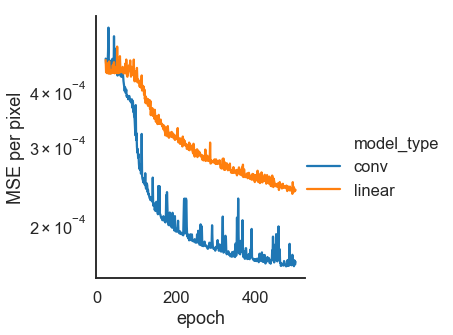

In [88]:
sns.set_style('white')
sns.set_context('talk')

# data_queried = metrics[~pd.notna(metrics.test_loss)]
lab = 'steinmetz-face'
data_queried = metrics_df[
    (metrics_df.dtype=='val') & 
    (metrics_df.epoch>20) & 
    (metrics_df.data==lab)]

y_axis = 'loss' # 'test_loss' | 'test_r2'
plot_type = 'line'
hue = 'model_type'
x_axis = 'epoch' # 'layers' | 'layer_size' | 'pred' | 'lags'

if len(data_queried.data.unique()) > 1:
    col = 'data'
    col_wrap = 2
    splt = sns.relplot(
        x=x_axis, y=y_axis, hue=hue, kind=plot_type, col=col, col_wrap=2,
        data=data_queried)
    for i, ax in enumerate(splt.axes):
        ax[0].set_yscale('log')
        if i == 0:
            ax[0].set_ylabel('MSE per pixel')
else:
    splt = sns.relplot(
        x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)
    splt.ax.set_yscale('log')
    splt.ax.set_ylabel('MSE per pixel')
#     splt.ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     splt.ax.ticklabel_format(axis='y', style='sci', scilimits=(1, 2))  # (1, 2) a hack
    
save_file = None #str('/home/mattw/results/temp/%s_conv_ae_training_losses' % lab)
if save_file is not None:
    plt.savefig(save_file + '.jpg', dpi=300, format='jpeg')    

### plot conv vs linear test losses

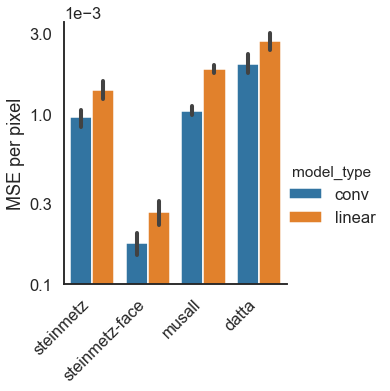

In [91]:
sns.set_style('white')
sns.set_context('talk')

data_queried = metrics_df[metrics_df.dtype=='test']
y_axis = 'loss'
plot_type = 'bar'  # 'bar' | 'box' | 'boxen'
hue = 'model_type'
x_axis = 'data'

splt = sns.catplot(
    x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)

plt.ylabel('MSE per pixel')
plt.xlabel('')
splt.ax.set_xticklabels(data_queried.data.unique(), rotation=45, ha='right')
splt.ax.set_yscale('log')
splt.ax.set_yticks([3e-3, 1e-3, 3e-4, 1e-4])
splt.ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
splt.ax.ticklabel_format(axis='y', style='sci', scilimits=(1, 2))  # (1, 2) a hack

save_file = None #'/home/mattw/results/temp/all_conv_ae_test_losses'
if save_file is not None:
    plt.savefig(save_file + '.jpg', dpi=300, format='jpeg')
    
plt.show()

# plot test losses as a function of latents

### load results

In [ ]:
metrics_df = []

hparams['experiment_name'] = 'best'
labs = ['musall']
model_types = ['conv', 'linear']
n_latents = [4, 8, 12, 16, 24, 64]

for lab in labs:
    get_lab_example(hparams, lab)
    for model_type in model_types:
        hparams['model_type'] = model_type
        for n_ae_latents in n_latents:
            hparams['n_ae_latents'] = n_ae_latents
            _, _, expt_dir = get_output_dirs(hparams)
            model_version = get_best_model_version(expt_dir)
            metric_file = os.path.join(expt_dir, model_version[0], 'metrics.csv')
            metrics = pd.read_csv(metric_file)
            for i, row in metrics.iterrows():
                metrics_df.append(pd.DataFrame({
                    'epoch': row['epoch'],
                    'loss': row['val_loss'],
                    'n_latents': n_ae_latents,
                    'dtype': 'val',
                    'model_type': model_type,
                    'data': lab
                }, index=[0]))
                metrics_df.append(pd.DataFrame({
                    'epoch': row['epoch'],use_output_mask
                    'loss': row['tr_loss'],
                    'n_latents': n_ae_latents,
                    'dtype': 'train',
                    'model_type': model_type,
                    'data': lab
                }, index=[0]))
                if 'test_loss' in row:
                    metrics_df.append(pd.DataFrame({
                        'epoch': row['epoch'],
                        'loss': row['test_loss'],
                        'n_latents': n_ae_latents,
                        'dtype': 'test',
                        'model_type': model_type,
                        'data': lab
                    }, index=[0]))
metrics_df = pd.concat(metrics_df)    

### plot conv vs ae test losses as a function of latents

In [ ]:
# data_queried = metrics[~pd.notna(metrics.test_loss)]
data_queried = metrics_df[metrics_df.dtype=='test']
y_axis = 'loss' # 'test_loss' | 'test_r2'
plot_type = 'line'
hue = 'model_type'
x_axis = 'n_latents' # 'layers' | 'layer_size' | 'pred' | 'lags'

splt = sns.relplot(
    x=x_axis, y=y_axis, hue=hue, kind=plot_type, data=data_queried)
for i, ax in enumerate(splt.axes):
    ax[0].set_yscale('log')
    if i == 0:
        ax[0].set_ylabel('MSE per pixel')

# make movies

Loading model defined in /home/mattw/results/behavenet/steinmetz/2-probe/mouse-01/session-01/ae/conv/12_latents/test_tube_data/test_pt/version_0/meta_tags.pkl
Loading model defined in /home/mattw/results/behavenet/steinmetz/2-probe/mouse-01/session-01/ae/linear/12_latents/test_tube_data/test_pt/version_0/meta_tags.pkl
video saved to /home/mattw/results/temp/steinmetz_+linear_test_pt.mp4
Loading model defined in /home/mattw/results/behavenet/steinmetz/2-probe-face/mouse-01/session-01/ae/conv/12_latents/test_tube_data/test_pt/version_0/meta_tags.pkl
Loading model defined in /home/mattw/results/behavenet/steinmetz/2-probe-face/mouse-01/session-01/ae/linear/12_latents/test_tube_data/test_pt/version_0/meta_tags.pkl
video saved to /home/mattw/results/temp/steinmetz-face_+linear_test_pt.mp4
Loading model defined in /home/mattw/results/behavenet/musall/vistrained/mSM30/10-Oct-2017/ae/conv/16_latents/test_tube_data/test_pt/version_0/meta_tags.pkl
Loading model defined in /home/mattw/results/beh

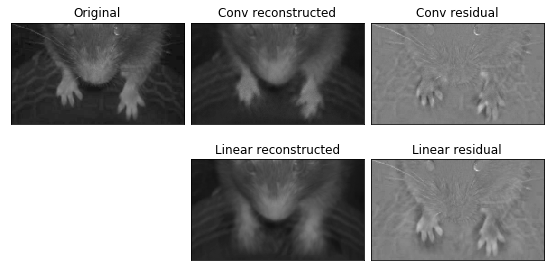

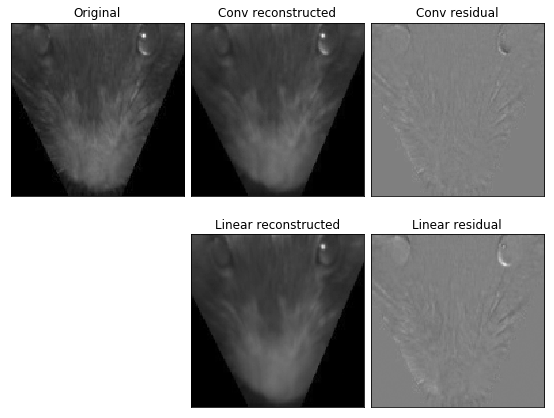

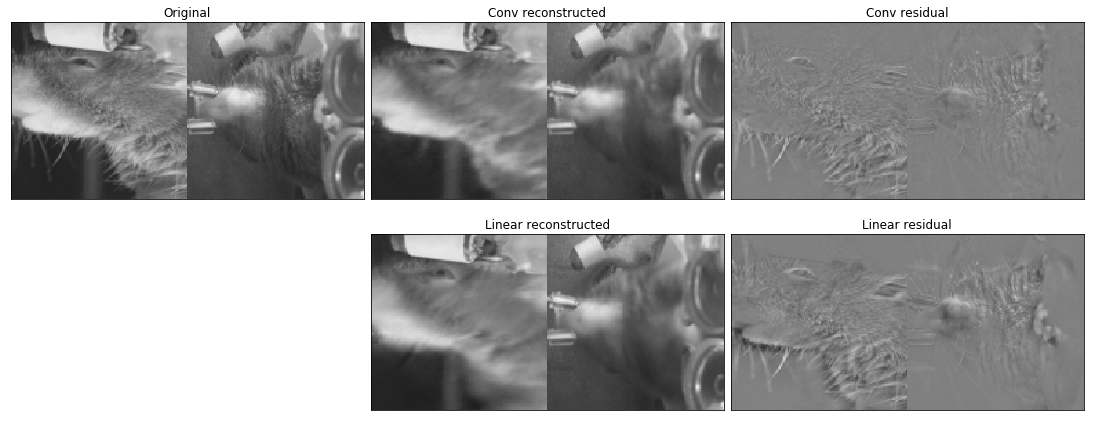

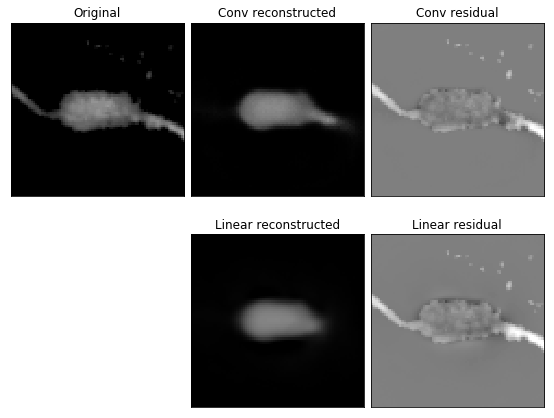

In [23]:
from analyses.ae.movies import make_ae_reconstruction_movie
from fitting.utils import get_lab_example
from data.data_generator import ConcatSessionsGenerator
include_linear = True
version = 'best'
hparams = {
    'data_dir': '/home/mattw/data',  # might be a different path than what is saved in hparams
    'tt_save_path': '/home/mattw/results/behavenet',
    'experiment_name': 'test_pt',
    'model_class': 'ae',
    'model_type': 'conv',
    'lib': 'pt'}

labs = ['steinmetz', 'steinmetz-face', 'musall', 'datta']

for lab in labs:
    get_lab_example(hparams, lab)
    data_generator = ConcatSessionsGenerator(
        hparams['data_dir'], hparams, 
        signals=['images'], transforms=[None], load_kwargs=[None],
        device='cpu', as_numpy=False, batch_load=True, rng_seed=0)
    trial = data_generator.batch_indxs[0]['test'][4]

    save_file = str('/home/mattw/results/temp/%s' % lab)
    if include_linear:
        save_file += '_+linear'
    save_file += '_%s' % hparams['experiment_name']

    make_ae_reconstruction_movie(
        hparams, version=version, save_file=save_file, include_linear=include_linear,
        trial=trial)